# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

[[-5.13764691e-01  1.67232930e-01  3.04783350e-01]
 [ 1.95077539e-02 -5.09652183e-03 -4.38074301e-03]
 [ 2.92229174e-01  1.18896894e-01 -4.32018096e-01]
 [-2.33121075e-01  1.86288200e-01  3.96198312e-02]
 [ 7.78174796e-01 -3.54233027e-01 -4.41137965e-01]
 [ 4.28331870e-03  6.65172228e-04  3.02471899e-03]
 [-6.34322094e-03 -3.62741166e-03 -6.72460447e-03]
 [ 6.17281609e-02 -1.29900489e-01  3.91825079e-02]
 [ 6.32053946e-01 -8.44023524e-02 -5.66197124e-01]
 [ 8.89334995e-01 -6.04709349e-01 -2.88551353e-01]]
W2 max relative error: 3.440708e-09
[ 0.2099691 -0.1431905 -0.0667786]
b2 max relative error: 4.447646e-11
[[-9.68499042e-02  4.00157207e-03 -2.05517828e-01  1.87986352e-01
   1.60531645e-01 -9.77277881e-03  9.50088417e-03  2.68884345e-03
  -3.01022811e-02 -5.67802800e-03]
 [ 4.45595008e-02  1.45427351e-02  6.95515502e-01 -2.88616327e-01
  -2.66986989e-01  3.33674328e-03  1.49407907e-02  1.93435586e-02
  -6.54700997e-02 -5.32928651e-01]
 [ 1.16977821e-02  6.53618595e-03 -2.31623550e-0

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.06201320188607037


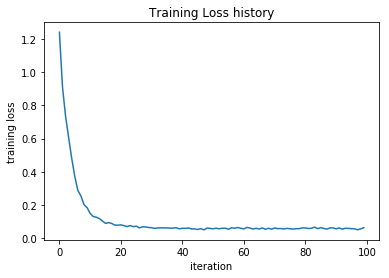

In [11]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [12]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [21]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302966
(10,)
(10,)
iteration 100 / 1000: loss 2.302619
iteration 200 / 1000: loss 2.297922
(10,)
(10,)
iteration 300 / 1000: loss 2.255647
iteration 400 / 1000: loss 2.210430
(10,)
(10,)
iteration 500 / 1000: loss 2.120434
iteration 600 / 1000: loss 2.012349
iteration 700 / 1000: loss 2.051947
(10,)
(10,)
iteration 800 / 1000: loss 2.006251
iteration 900 / 1000: loss 1.939732
(10,)
(10,)
(10,)
Validation accuracy:  0.285


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

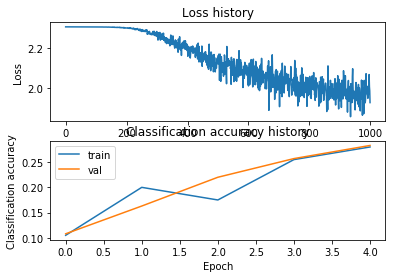

In [22]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

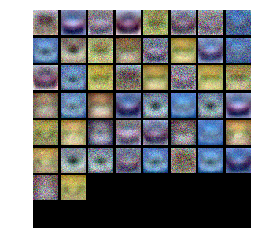

In [23]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [26]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
input_size = 32 * 32 * 3
num_classes = 10

hidden_size_com = range(50,100,10)
learning_rate_com=[8e-5,1e-4,1.2e-4]
reg_com=[0.25,0.35,0.45,0.55]
best_val=-1
best_net=None
for hidden_size in hidden_size_com:
    for lr in learning_rate_com:
        for rg in reg_com:
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=rg, verbose=True)
            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc>best_val:
                best_net=net
                best_val=val_acc
                print("最佳准确率已更新为：")
                print(best_val)

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 1500: loss 2.303004
iteration 100 / 1500: loss 2.302700
iteration 200 / 1500: loss 2.301594
iteration 300 / 1500: loss 2.289358
iteration 400 / 1500: loss 2.246893
iteration 500 / 1500: loss 2.172227
iteration 600 / 1500: loss 2.179781
iteration 700 / 1500: loss 2.107379
iteration 800 / 1500: loss 2.042823
iteration 900 / 1500: loss 2.013800
iteration 1000 / 1500: loss 2.012325
iteration 1100 / 1500: loss 1.939517
iteration 1200 / 1500: loss 2.011090
iteration 1300 / 1500: loss 1.897377
iteration 1400 / 1500: loss 1.943405
最佳准确率已更新为：
0.303
iteration 0 / 1500: loss 2.303091
iteration 100 / 1500: loss 2.302863
iteration 200 / 1500: loss 2.301812
iteration 300 / 1500: loss 2.291882
iteration 400 / 1500: loss 2.251118
iteration 500 / 1500: loss 2.178204
iteration 600 / 1500: loss 2.164092
iteration 700 / 1500: loss 2.083792
iteration 800 / 1500: loss 2.027835
iteration 900 / 1500: loss 2.087633
iteration 1000 / 1500: loss 2.073987
iteration 1100 / 1500: loss 1.978165
iteratio

iteration 0 / 1500: loss 2.303612
iteration 100 / 1500: loss 2.303229
iteration 200 / 1500: loss 2.300848
iteration 300 / 1500: loss 2.287404
iteration 400 / 1500: loss 2.236993
iteration 500 / 1500: loss 2.183193
iteration 600 / 1500: loss 2.103697
iteration 700 / 1500: loss 2.085442
iteration 800 / 1500: loss 2.070527
iteration 900 / 1500: loss 2.044995
iteration 1000 / 1500: loss 2.001474
iteration 1100 / 1500: loss 1.913201
iteration 1200 / 1500: loss 2.019766
iteration 1300 / 1500: loss 2.046353
iteration 1400 / 1500: loss 1.949334
iteration 0 / 1500: loss 2.303069
iteration 100 / 1500: loss 2.302679
iteration 200 / 1500: loss 2.297756
iteration 300 / 1500: loss 2.261717
iteration 400 / 1500: loss 2.195682
iteration 500 / 1500: loss 2.206832
iteration 600 / 1500: loss 2.046123
iteration 700 / 1500: loss 2.037913
iteration 800 / 1500: loss 2.017864
iteration 900 / 1500: loss 2.045870
iteration 1000 / 1500: loss 2.058659
iteration 1100 / 1500: loss 1.906894
iteration 1200 / 1500: lo

iteration 100 / 1500: loss 2.302971
iteration 200 / 1500: loss 2.299002
iteration 300 / 1500: loss 2.260654
iteration 400 / 1500: loss 2.214399
iteration 500 / 1500: loss 2.162649
iteration 600 / 1500: loss 2.104237
iteration 700 / 1500: loss 1.967049
iteration 800 / 1500: loss 1.956019
iteration 900 / 1500: loss 2.017654
iteration 1000 / 1500: loss 2.012308
iteration 1100 / 1500: loss 1.956324
iteration 1200 / 1500: loss 1.928946
iteration 1300 / 1500: loss 1.921819
iteration 1400 / 1500: loss 1.931254
iteration 0 / 1500: loss 2.303793
iteration 100 / 1500: loss 2.303223
iteration 200 / 1500: loss 2.298583
iteration 300 / 1500: loss 2.264559
iteration 400 / 1500: loss 2.130675
iteration 500 / 1500: loss 2.095630
iteration 600 / 1500: loss 2.129838
iteration 700 / 1500: loss 2.005572
iteration 800 / 1500: loss 1.997086
iteration 900 / 1500: loss 1.998999
iteration 1000 / 1500: loss 1.984039
iteration 1100 / 1500: loss 1.885700
iteration 1200 / 1500: loss 1.866856
iteration 1300 / 1500:

iteration 200 / 1500: loss 2.286512
iteration 300 / 1500: loss 2.197021
iteration 400 / 1500: loss 2.127173
iteration 500 / 1500: loss 2.061391
iteration 600 / 1500: loss 2.021328
iteration 700 / 1500: loss 2.006703
iteration 800 / 1500: loss 1.928951
iteration 900 / 1500: loss 1.904914
iteration 1000 / 1500: loss 1.858321
iteration 1100 / 1500: loss 1.923066
iteration 1200 / 1500: loss 1.837732
iteration 1300 / 1500: loss 1.746399
iteration 1400 / 1500: loss 1.798089
iteration 0 / 1500: loss 2.303707
iteration 100 / 1500: loss 2.303053
iteration 200 / 1500: loss 2.280484
iteration 300 / 1500: loss 2.211441
iteration 400 / 1500: loss 2.130017
iteration 500 / 1500: loss 2.087324
iteration 600 / 1500: loss 1.999841
iteration 700 / 1500: loss 2.036513
iteration 800 / 1500: loss 2.018594
iteration 900 / 1500: loss 1.915964
iteration 1000 / 1500: loss 1.966560
iteration 1100 / 1500: loss 1.976589
iteration 1200 / 1500: loss 1.964736
iteration 1300 / 1500: loss 1.858682
iteration 1400 / 1500

In [38]:
 net = TwoLayerNet(32*32*3, 100, 10)
# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
num_iters=4000, batch_size=200,
learning_rate=1.1e-3, learning_rate_decay=0.95,
reg=0.7, verbose=True)
# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
best_net=net
best_val=val_acc
print("最佳准确率已更新为：")
print(best_val)

iteration 0 / 4000: loss 2.304775
iteration 100 / 4000: loss 1.919315
iteration 200 / 4000: loss 1.760143
iteration 300 / 4000: loss 1.735089
iteration 400 / 4000: loss 1.700911
iteration 500 / 4000: loss 1.577958
iteration 600 / 4000: loss 1.569645
iteration 700 / 4000: loss 1.548663
iteration 800 / 4000: loss 1.531457
iteration 900 / 4000: loss 1.612924
iteration 1000 / 4000: loss 1.569023
iteration 1100 / 4000: loss 1.537496
iteration 1200 / 4000: loss 1.560298
iteration 1300 / 4000: loss 1.629244
iteration 1400 / 4000: loss 1.582025
iteration 1500 / 4000: loss 1.609354
iteration 1600 / 4000: loss 1.525307
iteration 1700 / 4000: loss 1.526760
iteration 1800 / 4000: loss 1.595021
iteration 1900 / 4000: loss 1.543987
iteration 2000 / 4000: loss 1.509893
iteration 2100 / 4000: loss 1.513184
iteration 2200 / 4000: loss 1.499639
iteration 2300 / 4000: loss 1.610636
iteration 2400 / 4000: loss 1.566033
iteration 2500 / 4000: loss 1.506837
iteration 2600 / 4000: loss 1.539765
iteration 270

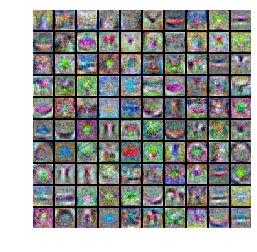

In [39]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [40]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.519


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

